In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Rishabh\OneDrive\Desktop\stress detection.txt")
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [4]:
df.shape

(2838, 116)

In [5]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [6]:
df.dtypes

subreddit                    object
post_id                      object
sentence_range               object
text                         object
id                            int64
                             ...   
lex_dal_avg_pleasantness    float64
social_upvote_ratio         float64
social_num_comments           int64
syntax_fk_grade             float64
sentiment                   float64
Length: 116, dtype: object

In [7]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [10]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [11]:
# cleaning the text column

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import string
a=string.punctuation
from nltk.stem import PorterStemmer
ps=PorterStemmer()

# function for text cleaning
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in a:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [12]:
df['text']=df['text'].apply(transform_text)

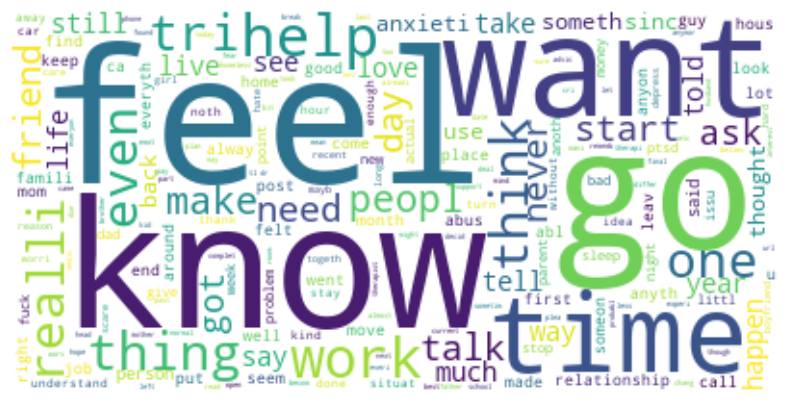

In [13]:
# wordcloud for text attribute

from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
text=" ".join(i for i in df.text)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
df['label']=df['label'].map({0:'No Stress',1:'Stress'})
data=df[['text','label']]
data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey sure right place post goe current student ...,No Stress
2,mom hit newspap shock would know like play hit...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


C:\Users\Rishabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


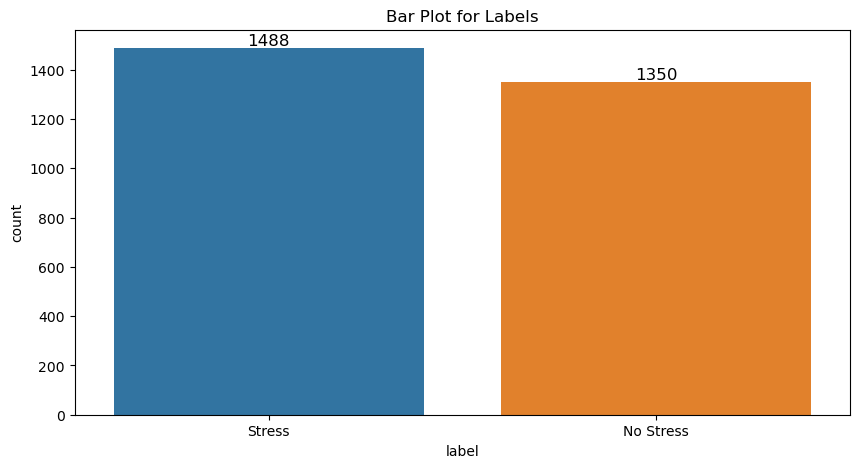

In [97]:
# Barplot for labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
ax = sns.countplot(df['label'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2, height),ha='center', va='bottom', fontsize=12)  
plt.title('Bar Plot for Labels')
plt.show()

# Occurrences of rows with stress label is greater

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X= np.array(data["text"])
Y= np.array(data["label"])

### Count Vectorizer

In [47]:
cv=CountVectorizer()
X=cv.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=10)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score
model1=MultinomialNB()
model2=BernoulliNB()

In [49]:
model1.fit(xtrain,ytrain)
y_pred1=model1.predict(xtest)
print("Classification report for MultinomialNB is : \n",classification_report(ytest,y_pred1))

Classification report for MultinomialNB is : 
               precision    recall  f1-score   support

   No Stress       0.81      0.64      0.72       277
      Stress       0.72      0.86      0.78       291

    accuracy                           0.75       568
   macro avg       0.76      0.75      0.75       568
weighted avg       0.76      0.75      0.75       568



In [50]:
model2.fit(xtrain,ytrain)
y_pred2=model2.predict(xtest)
print("Classification report for BernoulliNB is : \n",classification_report(ytest,y_pred2))
print()


# Bernoulli Naive Bayes performs better when used with Count Vectorizer

Classification report for MultinomialNB is : 
               precision    recall  f1-score   support

   No Stress       0.82      0.68      0.74       277
      Stress       0.74      0.86      0.79       291

    accuracy                           0.77       568
   macro avg       0.78      0.77      0.77       568
weighted avg       0.78      0.77      0.77       568




### Tf-idf Vectorizer

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X= np.array(data["text"])
Y= np.array(data["label"])

In [87]:
tf=CountVectorizer()
X=tf.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=10)

In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score
model1=MultinomialNB()
model2=BernoulliNB()

In [89]:
model1.fit(xtrain,ytrain)
y_pred1=model1.predict(xtest)
print("Classification report for MultinomialNB is : \n",classification_report(ytest,y_pred1))

Classification report for MultinomialNB is : 
               precision    recall  f1-score   support

   No Stress       0.81      0.64      0.72       277
      Stress       0.72      0.86      0.78       291

    accuracy                           0.75       568
   macro avg       0.76      0.75      0.75       568
weighted avg       0.76      0.75      0.75       568



In [90]:
model2.fit(xtrain,ytrain)
y_pred2=model2.predict(xtest)
print("Classification report for BernoulliNB is : \n",classification_report(ytest,y_pred2))
print()

# Bernoulli Naive Bayes performs better when used with Tf-idf Vectorizer

Classification report for MultinomialNB is : 
               precision    recall  f1-score   support

   No Stress       0.82      0.68      0.74       277
      Stress       0.74      0.86      0.79       291

    accuracy                           0.77       568
   macro avg       0.78      0.77      0.77       568
weighted avg       0.78      0.77      0.77       568


